# From Freshmen to Senior Year:
### A Close Look at Secondary School Student Performance in Ontario

In [204]:
import pandas as pd
from pandas import Series, DataFrame
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

The data below was obtained from https://www.ontario.ca/data/school-information-and-student-demographics

In [205]:
schools = pd.read_csv('ontario_highschools_data.csv', encoding='latin-1', na_values=['N/D', 'N/R', 'SP', 'A/D', 'S. R.'])
schools.head()

,Board Name,School Number,School Name,School Language,Street,City,Postal Code,Enrolment,Latitude,Longitude,...,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Acheivement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education
0,Algoma DSB,902344,Algoma Education Connection Secondary School,English,550 NORTHERN AVENUE,Sault Ste. Marie,P6B4J4,236.0,46.53477,-84.30772,...,NaN,18.6,NaN,NaN,NaN,NaN,NaN,NaN,33.88,NaN
1,Algoma DSB,891347,Central Algoma Secondary School,English,1 Kensington,Desbarats,P0R1E0,322.0,46.34007,-83.93690,...,NaN,31.1,NaN,0.89,13.0,0.45,0.66,1.0,15.61,NaN
2,Algoma DSB,900869,Chapleau High School,English,20 Teak,Chapleau,P0M1K0,74.0,47.84273,-83.40830,...,NaN,35.1,NaN,NaN,NaN,NaN,0.60,-28.0,17.27,NaN
3,Algoma DSB,908010,Elliot Lake Secondary School,English,303 Mississauga,Elliot Lake,P5A1E8,325.0,46.37627,-82.66108,...,NaN,26.2,NaN,0.80,-1.0,0.29,0.75,-5.0,26.54,3.36
4,Algoma DSB,917370,Hornepayne High School,English,162 Forth,Hornepayne,P0M1Z0,59.0,49.21525,-84.77894,...,NaN,20.3,NaN,NaN,NaN,NaN,0.58,-4.0,NaN,NaN


The data below was obtained from https://www.ontario.ca/data/ontario-public-school-contact-information

In [206]:
contacts = pd.read_table('public_schools_contact_september2018_en.txt', sep='|')
contacts = contacts[contacts['School Level']=='Secondary']
contacts = contacts[['School Number', "Principal's First Name", "Principal's Last Name"]]
contacts = contacts.rename(columns={"Principal's First Name": 'First Name', "Principal's Last Name": 'Last Name'})
contacts = contacts.dropna()
contacts[['First Name', 'Last Name']] = contacts[['First Name', 'Last Name']].applymap(str.upper)
contacts.head()

,School Number,First Name,Last Name
0,902344,PAUL,CALDBICK
6,992232,PAUL,CALDBICK
7,648957,JERRY,KAHTAVA
10,891347,JERRY,KAHTAVA
12,900869,NICOLLE,SCHUURMAN


The data below was obtained from https://www.ontario.ca/page/public-sector-salary-disclosure-2017-all-sectors-and-seconded-employees. Referred to colloquially as the 'Sunshine List', it contains the names and salaries of all public sector employees earning over $100,000 in Ontario.

In [207]:
sslst = pd.read_csv('en-2017-pssd-compendium-20180320-utf8.csv')
sslst = sslst[sslst['Job Title']=='Secondary Principal']
sslst = sslst[['Last Name', 'First Name', 'Salary Paid']]
sslst['Salary Paid'] = sslst['Salary Paid'].str.replace(r'[$,]', '').astype(float)
sslst[['Last Name', 'First Name']] = sslst[['Last Name', 'First Name']].applymap(str.upper)
sslst.head()

,Last Name,First Name,Salary Paid
94716,MILLER,GLENN,126338.42
94717,VAN WIERINGEN,ALEX,125346.33
96936,FERGUSON,SUSAN,124469.27
96943,GARRETT,JUDITH,119547.85
96964,HUNT,MARK,125508.02


In [208]:
merged_contacts = pd.merge(contacts, sslst, on=['Last Name', 'First Name'], how='inner')
merged_contacts.head()

,School Number,First Name,Last Name,Salary Paid
0,993263,RALF,MESENBRINK,126136.29
1,899569,CHRISTOPHER,SMITH,104105.25
2,913600,KENDRA,BROHMAN,126136.29
3,923095,KIMBERLEY,CRAWFORD,114438.91
4,927120,PETRA,GOETZ,126136.29


Out of the 299 names on the Sunshine List, 289 of them were successfully matched with a record in the contacts

In [209]:
len(merged_contacts), len(sslst)

(285, 299)

In [210]:
merged_schools = pd.merge(schools, merged_contacts, on=['School Number'], how='left')
merged_schools.head()

,Board Name,School Number,School Name,School Language,Street,City,Postal Code,Enrolment,Latitude,Longitude,...,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Acheivement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,First Name,Last Name,Salary Paid
0,Algoma DSB,902344,Algoma Education Connection Secondary School,English,550 NORTHERN AVENUE,Sault Ste. Marie,P6B4J4,236.0,46.53477,-84.30772,...,NaN,NaN,NaN,NaN,NaN,33.88,NaN,NaN,NaN,NaN
1,Algoma DSB,891347,Central Algoma Secondary School,English,1 Kensington,Desbarats,P0R1E0,322.0,46.34007,-83.93690,...,0.89,13.0,0.45,0.66,1.0,15.61,NaN,NaN,NaN,NaN
2,Algoma DSB,900869,Chapleau High School,English,20 Teak,Chapleau,P0M1K0,74.0,47.84273,-83.40830,...,NaN,NaN,NaN,0.60,-28.0,17.27,NaN,NaN,NaN,NaN
3,Algoma DSB,908010,Elliot Lake Secondary School,English,303 Mississauga,Elliot Lake,P5A1E8,325.0,46.37627,-82.66108,...,0.80,-1.0,0.29,0.75,-5.0,26.54,3.36,NaN,NaN,NaN
4,Algoma DSB,917370,Hornepayne High School,English,162 Forth,Hornepayne,P0M1Z0,59.0,49.21525,-84.77894,...,NaN,NaN,NaN,0.58,-4.0,NaN,NaN,NaN,NaN,NaN


923 schools where the principal was on the Sunshine List  
246 schools where the principal was not on the Sunshine List

In [211]:
len(merged_schools['Salary Paid'].isnull()), len(merged_schools['Salary Paid'].dropna())

(923, 246)

The data below was obtained from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/download-telecharger/comp/page_dl-tc.cfm?Lang=E  
*Note: this data describes Forward Sortation Areas (FSAs), not individual schools/school boards

In [212]:
census = pd.read_csv('school_census_data.csv')
census['Visible minority population as % of total'] = census['Total visible minority population'] / census['Population, 2016'] * 100
census['Low-income status as % of total'] = census['Total - low-income status'] / census['Population, 2016'] * 100
census = census.drop(columns=['Total visible minority population'])
census = census.drop_duplicates('FSA')
census.head()

,FSA,"Population, 2016",Government transfers (% of total income),Median total income of households ($),Average total income of households ($),Total - low-income status,Not a visible minority,Unemployment rate,Visible minority population as % of total,Low-income status as % of total
0,P6B,22847.0,18.1,57710.0,73250.0,22270.0,21380.0,10.3,4.442596,97.474504
1,P0R,12479.0,20.4,56666.0,71052.0,11710.0,12105.0,10.0,1.161952,93.837647
2,P0M,49750.0,14.2,74467.0,89105.0,47845.0,48825.0,9.2,0.934673,96.170854
3,P5A,10741.0,31.0,42466.0,57539.0,10580.0,10350.0,11.3,2.141328,98.501071
5,P6C,19322.0,19.1,59240.0,71154.0,19310.0,19090.0,10.2,1.267985,99.937895


In [213]:
merged_schools['FSA'] = merged_schools['Postal Code'].str[:3]
master_df = pd.merge(merged_schools, census, on='FSA', how='left')
master_df.head()

,Board Name,School Number,School Name,School Language,Street,City,Postal Code,Enrolment,Latitude,Longitude,...,FSA,"Population, 2016",Government transfers (% of total income),Median total income of households ($),Average total income of households ($),Total - low-income status,Not a visible minority,Unemployment rate,Visible minority population as % of total,Low-income status as % of total
0,Algoma DSB,902344,Algoma Education Connection Secondary School,English,550 NORTHERN AVENUE,Sault Ste. Marie,P6B4J4,236.0,46.53477,-84.30772,...,P6B,22847.0,18.1,57710.0,73250.0,22270.0,21380.0,10.3,4.442596,97.474504
1,Algoma DSB,891347,Central Algoma Secondary School,English,1 Kensington,Desbarats,P0R1E0,322.0,46.34007,-83.93690,...,P0R,12479.0,20.4,56666.0,71052.0,11710.0,12105.0,10.0,1.161952,93.837647
2,Algoma DSB,900869,Chapleau High School,English,20 Teak,Chapleau,P0M1K0,74.0,47.84273,-83.40830,...,P0M,49750.0,14.2,74467.0,89105.0,47845.0,48825.0,9.2,0.934673,96.170854
3,Algoma DSB,908010,Elliot Lake Secondary School,English,303 Mississauga,Elliot Lake,P5A1E8,325.0,46.37627,-82.66108,...,P5A,10741.0,31.0,42466.0,57539.0,10580.0,10350.0,11.3,2.141328,98.501071
4,Algoma DSB,917370,Hornepayne High School,English,162 Forth,Hornepayne,P0M1Z0,59.0,49.21525,-84.77894,...,P0M,49750.0,14.2,74467.0,89105.0,47845.0,48825.0,9.2,0.934673,96.170854


Let's take a look at the distribution of the percentage of students whose first language is not English, grouped by the first letter of a school's postal code. As can be seen in the histograms below, Toronto (the 'M' postal code) has a very different distribution than the other groups; most schools in M have close to 50% of students whose first language is not English.

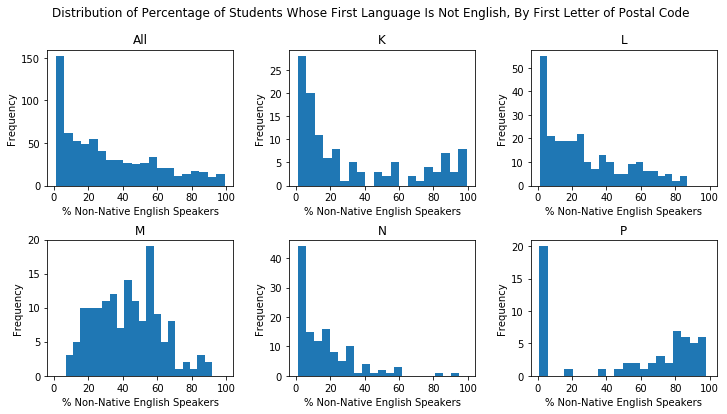

In [214]:
groups = master_df.groupby(master_df['Postal Code'].str[0])
colname = 'Percentage of Students Whose First Language Is Not English'
xlabel = '% Non-Native English Speakers'
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax[0][0].hist(master_df[colname].dropna().values, bins=20)
ax[0][0].set_title('All')
ax[0][0].set_xlabel(xlabel)
ax[0][0].set_ylabel('Frequency')
for i, (name, group) in enumerate(groups):
    ax_i = ax[(i+1)//3][(i+1)%3]
    ax_i.set_xlim(ax[0][0].get_xlim())
    ax_i.set_title(name)
    ax_i.hist(group[colname].dropna().values, bins=20)
    ax_i.set_xlabel(xlabel)
    ax_i.set_ylabel('Frequency')
fig.suptitle('Distribution of %s, By First Letter of Postal Code' % colname)
plt.show()

Now we'll split the schools into 3 quantiles based on enrolment size, and calculate some correlations:

In [215]:
def corr_frame(group):
    corr_pairs = [
        ('Median total income of households ($)', 'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'),
        ('Median total income of households ($)', 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'),
        ('Unemployment rate', 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'),
        ('Percentage of Children Who Live in Low-Income Households', 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'),
        ('Visible minority population as % of total', 'Percentage of Students Whose First Language Is Not English'),
        ('Percentage of Students Whose First Language Is Not English', 'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'),
        ('Percentage of Students Whose First Language Is Not English', 'Percentage of Children Who Live in Low-Income Households'),
        ('Percentage of Students Whose Parents Have Some University Education', 'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'),
        ('Percentage of Students Whose Parents Have Some University Education', 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'), 
    ]
    return Series([group[col1].corr(group[col2]) for col1, col2 in corr_pairs],
                  index=['%s vs %s' % (col1, col2) for col1, col2 in corr_pairs])
colname = 'Enrolment'
cuts = pd.qcut(master_df[colname], 3)
corrs = master_df.groupby(cuts).apply(corr_frame).T
corrs.columns=pd.Index(['(%d, %d]' % (round(t.left), round(t.right)) for t in corrs.columns], name=colname)
corrs['All'] = corr_frame(master_df)
corrs

Enrolment,"(12, 434]","(434, 921]","(921, 2042]",All
Median total income of households ($) vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.098966,0.189913,0.361565,0.256042
Median total income of households ($) vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.072925,0.241758,0.352145,0.250822
Unemployment rate vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,-0.065833,-0.103869,-0.302109,-0.151857
Percentage of Children Who Live in Low-Income Households vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,-0.306795,-0.233779,-0.360782,-0.288599
Visible minority population as % of total vs Percentage of Students Whose First Language Is Not English,-0.188964,0.537347,0.696283,0.313119
Percentage of Students Whose First Language Is Not English vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.475896,0.132676,0.069225,0.219394
Percentage of Students Whose First Language Is Not English vs Percentage of Children Who Live in Low-Income Households,0.045659,0.425234,0.575583,0.385284
Percentage of Students Whose Parents Have Some University Education vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.310705,0.294293,0.495254,0.395022
Percentage of Students Whose Parents Have Some University Education vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.230055,0.260851,0.459995,0.353503


There was an r-value of 0.576 for the correlation between 'Percentage of Students Whose First Language Is Not English' and 'Percentage of Children Who Live in Low-Income Households' in the 3rd quantile. After plotting these two factors for both the 3rd quantile and all the schools, we can see that there is a higher correlation in large schools (based on enrolment) than overall.

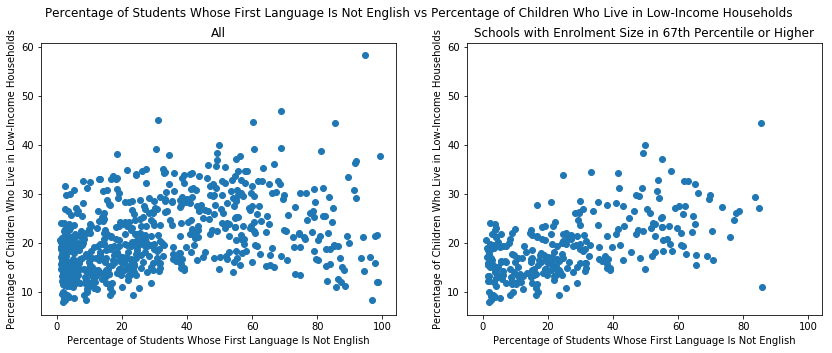

In [216]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(14, 5))
def corr_scatter(col1, col2, title2):
    df = master_df[[col1, col2]].dropna()
    ax[0].scatter(df[col1].values, df[col2].values)
    df = master_df[master_df['Enrolment'] > 921][[col1, col2]].dropna()
    ax[1].scatter(df[col1].values, df[col2].values)
    ax[1].set_ylim(ax[0].get_ylim())
    ax[0].set_title('All')
    ax[1].set_title(title2)
    for ax_i in ax:
        ax_i.set_xlabel(col1)
        ax_i.set_ylabel(col2)
    fig.suptitle('%s vs %s' % (col1, col2))
corr_scatter('Percentage of Students Whose First Language Is Not English', 
             'Percentage of Children Who Live in Low-Income Households', 
             'Schools with Enrolment Size in 67th Percentile or Higher')
plt.show()

Let's calculate the same correlations again, this time for 3 different school boards:

In [217]:
boards = ['York Region DSB', 'Toronto DSB', 'Peel DSB']
groups = master_df[master_df['Board Name'].isin(boards)].groupby('Board Name')
groups = groups.apply(corr_frame).T
groups

Board Name,Peel DSB,Toronto DSB,York Region DSB
Median total income of households ($) vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.087652,0.416028,-0.027766
Median total income of households ($) vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.103004,0.227305,0.097055
Unemployment rate vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,-0.136255,-0.012700,0.307663
Percentage of Children Who Live in Low-Income Households vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,-0.021753,-0.448079,0.155867
Visible minority population as % of total vs Percentage of Students Whose First Language Is Not English,0.563306,0.502296,0.611110
Percentage of Students Whose First Language Is Not English vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.301884,-0.052241,0.400692
Percentage of Students Whose First Language Is Not English vs Percentage of Children Who Live in Low-Income Households,0.402363,0.507477,0.736598
Percentage of Students Whose Parents Have Some University Education vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.301284,0.395082,0.599026
Percentage of Students Whose Parents Have Some University Education vs Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.398911,0.441676,0.504978


Although all 3 school boards have positive correlations for 'Percentage of Students Whose Parents Have Some University Education vs Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt', York Region DSB has the strongest:

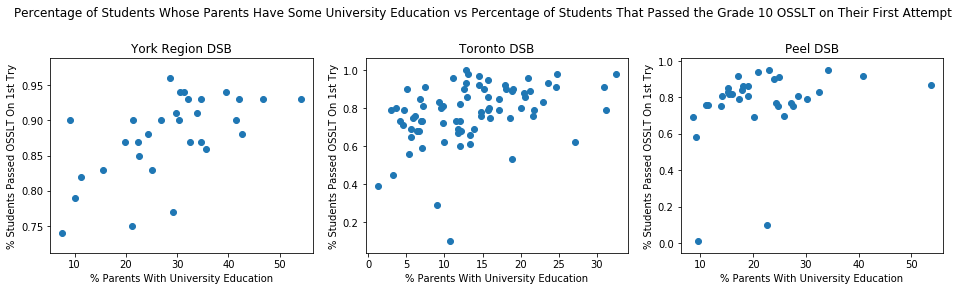

In [218]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.8)
col1 = 'Percentage of Students Whose Parents Have Some University Education'
col2 = 'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
for i, board in enumerate(boards):
    df = master_df[master_df['Board Name']==board][[col1, col2]].dropna()
    ax[i].scatter(df[col1].values, df[col2].values)
    ax[i].set_title(board)
    ax[i].set_xlabel('% Parents With University Education')
    ax[i].set_ylabel('% Students Passed OSSLT On 1st Try')
fig.suptitle('%s vs %s' % (col1, col2))
plt.show()

Now we'll separate the schools into those whose principals were on the Sunshine List and those whose principals weren't. Aside from the percentage of students whose first language is not English, most metrics appear to be mostly the same:

In [219]:
colnames = [
    'Percentage of Students Whose First Language Is Not English',
    'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
    'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',
    'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt',
    'Percentage of Students Identified as Gifted',
    'Percentage of Children Who Live in Low-Income Households',
    'Percentage of Students Whose Parents Have Some University Education',
    'Median total income of households ($)',
    'Visible minority population as % of total',
    'Unemployment rate'
]
groups = master_df.groupby(master_df['Salary Paid'].isnull())[colnames].mean()
groups.index = ['Principal Paid $100000+', 'Principal Paid < $100000']
groups.T

,Principal Paid $100000+,Principal Paid < $100000
Percentage of Students Whose First Language Is Not English,17.534239,36.673896
Percentage of Students Who Are New to Canada from a Non-English Speaking Country,4.594382,7.967986
Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.823899,0.799922
Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.783750,0.786431
Percentage of Students Identified as Gifted,4.322892,4.800719
Percentage of Children Who Live in Low-Income Households,18.076878,21.996070
Percentage of Students Whose Parents Have Some University Education,14.353207,13.122505
Median total income of households ($),78186.373984,73303.437870
Visible minority population as % of total,17.764280,25.718027
Unemployment rate,7.105691,7.945414


In terms of math and the OSSLT, Catholic schools appear to do slightly better than non-catholic ones:

In [220]:
pattern = r'(.* CDSB|CSDC .*|Conseil scolaire catholique .*|CS catholique .*)'
groups = master_df.groupby(master_df['Board Name'].str.match(pattern))[colnames].mean()
groups.index = ['Non-Catholic Schools', 'Catholic Schools']
groups.T

,Non-Catholic Schools,Catholic Schools
Percentage of Students Whose First Language Is Not English,29.938936,35.157872
Percentage of Students Who Are New to Canada from a Non-English Speaking Country,7.427468,6.667164
Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,0.794083,0.836473
Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,0.765495,0.833128
Percentage of Students Identified as Gifted,4.897041,3.745283
Percentage of Children Who Live in Low-Income Households,21.198331,20.124689
Percentage of Students Whose Parents Have Some University Education,13.315119,13.758009
Median total income of households ($),73914.196646,76313.003759
Visible minority population as % of total,22.653684,25.919483
Unemployment rate,7.684909,7.811278


Now we'll take a look at the distribution of Catholic and non-Catholic schools among the Sunshine List schools and the non-Sunshine List ones:

In [221]:
groups = master_df.groupby(master_df['Salary Paid'].isnull())['Board Name']
def count_csb(group):
    csb_count = group[group.str.match(pattern)].count()
    return Series([group.size-csb_count, csb_count], index=['Non-Catholic', 'Catholic'])
groups = groups.apply(count_csb)
groups.index.names = ['Principal Paid < $100000', 'Number of Schools, by School Board']
groups

Principal Paid < $100000  Number of Schools, by School Board
False                     Non-Catholic                          202
                          Catholic                               44
True                      Non-Catholic                          455
                          Catholic                              222
Name: Board Name, dtype: int64

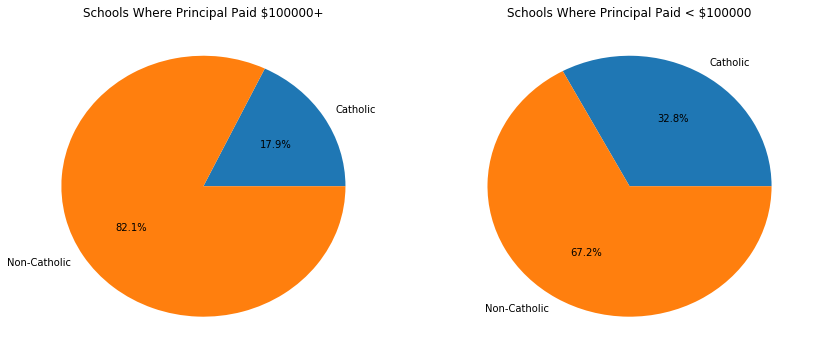

In [222]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
labels = ['Catholic', 'Non-Catholic']
ax[0].pie([groups[False]['Catholic'], groups[False]['Non-Catholic']], labels=labels, autopct='%.1f%%')
ax[0].set_title('Schools Where Principal Paid $100000+')
ax[1].pie([groups[True]['Catholic'], groups[True]['Non-Catholic']], labels=labels, autopct='%.1f%%')
ax[1].set_title('Schools Where Principal Paid < $100000')
plt.show()

So given that a school's principal is not on the Sunshine List, it is more likely to be a catholic school than if the principal had been on the list. Now let's calculate the reverse:

In [223]:
def count_sslst(group):
    on_sslst = group.dropna().size
    return Series([on_sslst, group.size - on_sslst], ['$100000+', '<$100000'])

groups = master_df.groupby(master_df['Board Name'].str.match(pattern))['Salary Paid']
groups = groups.apply(count_sslst)
groups.index.names = ['School is Catholic', "Principal's Salary"]
groups

School is Catholic  Principal's Salary
False               $100000+              202
                    <$100000              455
True                $100000+               44
                    <$100000              222
Name: Salary Paid, dtype: int64

Given that a school is catholic, it is less likely that the principal made over $100,000 than if the school was non-catholic:

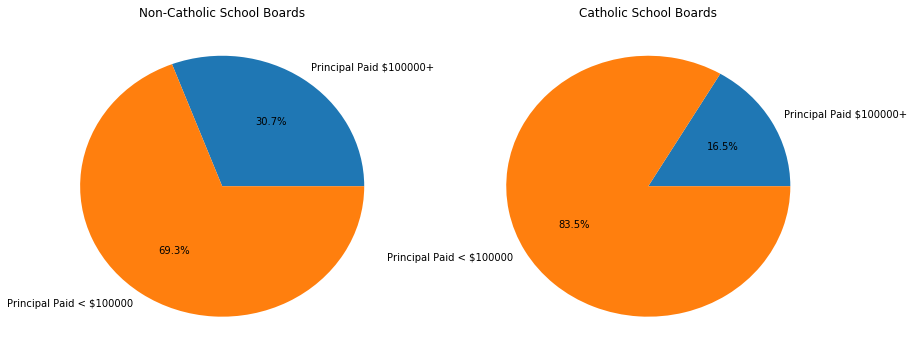

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
labels = ['Principal Paid $100000+', 'Principal Paid < $100000']
ax[0].pie(groups[False].values, labels=labels, autopct='%.1f%%')
ax[0].set_title('Non-Catholic School Boards')
ax[1].pie(groups[True].values, labels=labels, autopct='%.1f%%')
ax[1].set_title('Catholic School Boards')
plt.show()

In [302]:
minr, maxr = 36, 600
def gen_rscale(df):
    maxenrol, minenrol = df.Enrolment.max(), df.Enrolment.min()
    return lambda x: minr + (x - minenrol) / (maxenrol - minenrol) * (maxr - minr)
def init_map(llon, llat, ulon, ulat, res='l', land='#eebb77'):
    fig, ax = plt.subplots(figsize=(10, 10))
    m = Basemap(llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat, projection='tmerc', 
                lon_0=(llon+ulon)/2, lat_0=(llat+ulat)/2, ax=ax, resolution=res)
    m.fillcontinents(color=land, lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    return m

A geographic visualization of the percentage of students whose first language is not English, by school. Each circle represents a school; the size of the circle is proportional to the school's enrolment; and the colour represents the percentage. The color ranges from white (0%) to dark red (100%). 

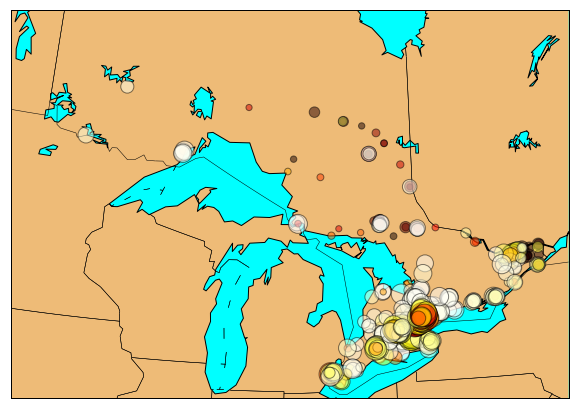

In [303]:
m = init_map(-95, 41, -72, 52)
colname = 'Percentage of Students Whose First Language Is Not English'
df = master_df[['Longitude', 'Latitude', 'Enrolment', colname]].dropna()
rscale = gen_rscale(df)
m.scatter(df.Longitude.values, df.Latitude.values, latlon=True, marker='o', edgecolors='k', alpha=0.5, 
          zorder=2, c=df[colname], cmap=plt.cm.hot_r, s=df.Enrolment.map(rscale).values)
plt.show()

Let's zoom into the GTA:

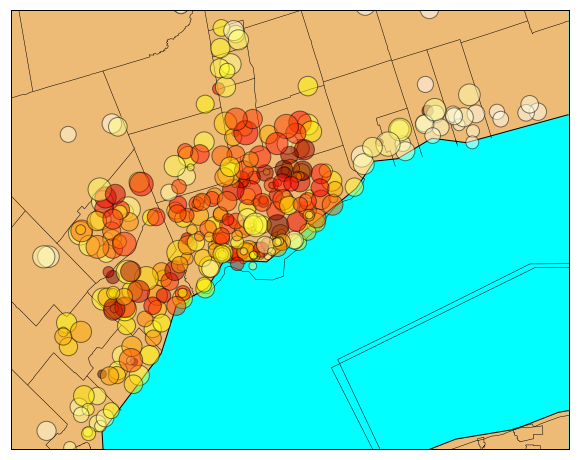

In [304]:
m = init_map(-80, 43.3, -78.6, 44.1, res='i')
colname = 'Percentage of Students Whose First Language Is Not English'
df = master_df[['Longitude', 'Latitude', 'Enrolment', colname]].dropna()
rscale = gen_rscale(df)
m.readshapefile('ontario_administrative/ontario_administrative', 'on_admin')
m.scatter(df.Longitude.values, df.Latitude.values, latlon=True, marker='o', edgecolors='k', alpha=0.5, 
          zorder=2, c=df[colname], cmap=plt.cm.hot_r, s=df.Enrolment.map(rscale).values)
plt.show()

In [228]:
features = json.loads(open('epublic.geojson').read())['features']
features += json.loads(open('ecatholic.geojson').read())['features']
features += json.loads(open('fpublic.geojson').read())['features']
features += json.loads(open('fcatholic.geojson').read())['features']

In [305]:
def cscale(x, vmin, vmax):
    return (x - vmin) / (vmax - vmin)
def choropleth():
    m = init_map(-83, 42, -74, 47, land='#ffffff')
    ax = plt.gca()
    colname = 'Percentage of Children Who Live in Low-Income Households'
    board_conv = {
        'Hastings and Prince Edward DSB': 'Hastings & Prince Edward DSB',
        'Trillium Lakelands': 'Trillium Lakelands DSB',
        'Nipissing-Parry Sound Catholic DSB': 'Nipissing-Parry Sound CDSB',
        'Near North': 'Near North DSB',
        'Algonquin and Lakeshore Catholic DSB': 'Algonquin and Lakeshore CDSB'
    }

    df = master_df[['Board Name', colname]].dropna()
    means = df.groupby(['Board Name'])[colname].mean()
    vmin, vmax = min(means), max(means)

    for feature in features:
        board = feature['properties']['NAME']
        if board not in means:
            board = board_conv.get(board, None)
        if board is None:
            continue
        g = cscale(means[board], vmin, vmax)
        fc = plt.cm.hot_r(g)
        if feature['geometry']['type'] == 'Polygon':
            for group in feature['geometry']['coordinates']:
                poly = plt.Polygon([m(x,y) for x,y in group], fc=fc, ec='k')
                ax.add_patch(poly)
        else:  # MultiPolygon
            for group in feature['geometry']['coordinates']:
                for coords in group:
                    poly = plt.Polygon([m(x,y) for x,y in coords], fc=fc, ec='k')
                    ax.add_patch(poly)
    
    return m

The choropleth map below shows the average percentage of students who come from low-income households, for each school board. The colour ranges from white (0%) to dark red (100%):

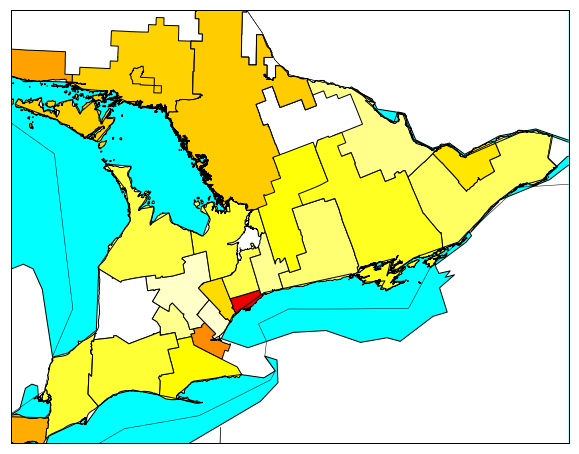

In [306]:
choropleth()
plt.show()

Now we'll plot the schools on top of the choropleth map, where the colour represents the percentage of Grade 9 students achieving the provincial standard in Academic Math. The colour ranges from light green (0%) to dark green (100%):

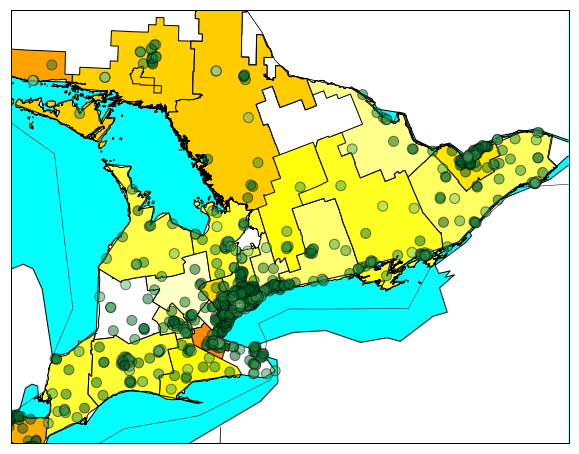

In [307]:
m = choropleth()
colname = 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'
df = master_df[['Longitude', 'Latitude', 'Enrolment', colname]].dropna()
m.scatter(df.Longitude.values, df.Latitude.values, latlon=True, marker='o', edgecolors='k', alpha=0.5, 
          zorder=2, c=df[colname], cmap=plt.cm.Greens, s=100)
plt.show()

In [310]:
master_df[master_df['School Name'].str.endswith('Jackson Secondary School')]

,Board Name,School Number,School Name,School Language,Street,City,Postal Code,Enrolment,Latitude,Longitude,...,FSA,"Population, 2016",Government transfers (% of total income),Median total income of households ($),Average total income of households ($),Total - low-income status,Not a visible minority,Unemployment rate,Visible minority population as % of total,Low-income status as % of total
445,Ottawa-Carleton DSB,890243,A.Y. Jackson Secondary School,English,150 Abbeyhill,Kanata,K2L1H7,732.0,45.29535,-75.88018,...,K2L,19162.0,9.4,91819.0,104146.0,18750.0,15800.0,7.4,15.786452,97.849911
676,Toronto DSB,890227,A Y Jackson Secondary School,English,50 Francine,Toronto,M2H2G6,854.0,43.80522,-79.36656,...,M2H,24497.0,13.1,72220.0,90314.0,24215.0,6075.0,8.8,75.213291,98.848839
